# A guide through adding waves of random amplitude and phase

Hit Shift+Enter to evaluate each cell and advance to the next one.

## First for the imports

This line needs to go before the imports for plots to work right.

In [7]:
%matplotlib inline

Now for the import statements

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Now for making our spreadsheet

In [40]:
# define an empty spreadsheet
df = pd.DataFrame()

# set a number of waves
N = 1000

# set an amplitude for each wave
# only uncomment one of the two lines below
df['amp'] = np.random.random_sample(N) # random amplitudes
# df['amp'] = np.ones(N) # all equal amplitudes of one

# now a column of random phases from 0 to 2pi
df['ph'] = 2*np.pi*np.random.random_sample(N)

# calculate real and imaginary parts of each wave
df['re'] = df['amp']*np.cos(df['ph'])
df['im'] = df['amp']*np.sin(df['ph'])

# calculate a column that represents resultant amplitude^2 
# for increaseing number of waves. Each entry in the column
# is the cumulative sum of the real and imaginary parts up
# to that point, squared and then added together.
df['ans'] = df['re'].cumsum()**2+df['im'].cumsum()**2

# for comparison to the other way of finding this resultant
# amplitude^2, we need to calculate the sum of the amplitudes squared
df['ampsq'] = df['amp']**2

# and then we will calculate the cumulative sum of that column
# as we increase the number of waves, for comparison purposes
df['sumampsq'] = df['ampsq'].cumsum()

# and finally we need to calculate the sum of the crossterms. 
# this is the weird summation that we are investigated whether
# it goes to zero as the number of waves increases. Some books refer
# to this as the interference term. I'll do this the easy way here
# and leave the slower but more explicit sum at the bottom of this 
# worksheet.
df['crosssum'] = df['ans'] - df['sumampsq']

## Now a sanity check

Lets see that the answer is in fact the sum of these two other sums. That is

$$
\underbrace{E^2}_\text{the resultant amplitude}
=
\underbrace{\sum_{i}^{N}E_i^2}_\text{sum of square amplitudes}
+
\underbrace{\sum_i^N\sum_{j>i}^{N}E_iE_j\cos(\alpha_j-\alpha_i)}_\text{crossterm sum}
$$

In [41]:
print('Answer = ', df['re'].sum()**2 + df['im'].sum()**2)
print('Last entry in answer columm =', df['ans'][-1:].item())
print('Sum of square amplitudes =', df['sumampsq'][-1:].item())
print('Crossterm sum =', df['crosssum'][-1:].item())

Answer =  858.8114222178439
Last entry in answer columm = 858.811422217844
Sum of square amplitudes = 338.55324172067884
Crossterm sum = 520.2581804971651


## Now a plot of this

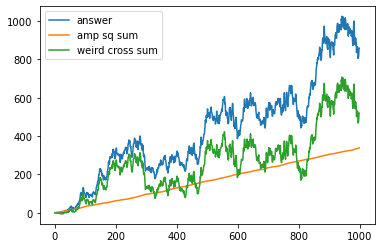

In [42]:
fig, ax = plt.subplots()

ax.plot(df.index, df['ans'])
ax.plot(df.index, df['sumampsq'])
ax.plot(df.index, df['crosssum'])

ax.legend(['answer', 'amp sq sum', 'weird cross sum'])

## Now what about the claim for constant amplitudes?

We want to do something like looking at the resultant amplitude over time


In [150]:
def esquared(N):
    waves = np.exp(1j*2*np.pi*np.random.rand(t,N)) # all equal amplitudes of one
    answer = waves.real.sum()**2+waves.imag.sum()**2
    return answer

### A very fast way

In [ ]:
# first generate a matrix of complex numbers representing random phases
test = np.exp(1j*2*np.pi*np.random.rand(1000000,1000))

# now sum over those columns
test2 = test.sum(axis=1)

# find the amplitude squared of that sum
test3 = test2*test2.conjugate()

# now average those
test3.mean().real

In [158]:
test = np.fromfunction(esquared,[1])
test

TypeError: 'numpy.float64' object cannot be interpreted as an integer

In [149]:
(test[15]*test[15].conjugate())**.5

32.44122960521708

In [97]:
#fig,ax = plt.subplots()
t = 10000
N=1000
esquares = np.zeros(t)
for i in range(t):
    df_temp = esquared(N)
    esquares[i] = df_temp.iloc[-1]
    #ax.plot(np.arange(N), esquared(N),'k')

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [83]:
esquares.mean()

993.3572814165242

Lets try that a faster way

In [66]:
t = 10000
N=1000
e = 
esquares = 

0.7187093276281056

## A slow but very clever way to do the crossterm sum

In [ ]:
df['slowsum'] = [df['amp'][i]*(df['amp'][i+1:]*np.cos(df['ph'][i]-df['ph'][i+1:])).sum() for i in df.index if i<len(df.index)]

## A VERY SLOW but somewhat clever way to do the crossterm sum

In [30]:
def e_crossterm(e_list, a_list, result):
    e_i = e_list.pop(0)
    a_i = a_list.pop(0)
    for j,e in enumerate(e_list):
        # print(e_i, a_i, e_list[j], a_list[j])
        result = result + e_i*e_list[j]*np.cos(a_i-a_list[j])
        # print(result)
    return e_list, a_list, result

result = 0

while len(e_list)>0:
    e_list, a_list, result = e_crossterm(e_list, a_list, result)

## A random walk

<AxesSubplot:>

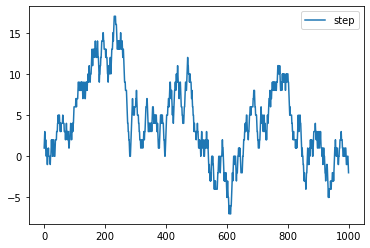

In [56]:
df3 = pd.DataFrame()
df3['step'] = np.random.choice(np.array([-1,0,1]),1000)
# df3.plot()
df3.cumsum().plot()

In [57]:
df3.mean()

step   -0.002
dtype: float64

In [59]:
df3.sum()

step   -2
dtype: int64